In [2]:
# Import libraries
import tweepy
from textblob import TextBlob
#from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# API Credentials
consumer_key = 'M5s6Kp0UlFHjWz8x71VVwFrzY'
consumer_secret = 'kISxZvHLxoZmT4P4dzLnAVx9eeN1aNSjE0kVf95OUDmbsHki4P'
access_token = '1220387467-uSvCGD9sLOEKvhBDp1MxDGDfodx74HWeNV4W5rR'
access_token_secret = 'DWrOUosnjjSYQq9uK2f2smDDulCDLt1LTQQ8jCqjdj9Yx'

In [4]:
# authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    
# Access token
authenticate.set_access_token(access_token, access_token_secret) 

api = tweepy.API(authenticate, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)

In [5]:
#Obtain the Bill Gates´s account info 
data = api.get_user("BillGates")
data

User(_api=<tweepy.api.API object at 0x000001DD1FE84A30>, _json={'id': 50393960, 'id_str': '50393960', 'name': 'Bill Gates', 'screen_name': 'BillGates', 'location': 'Seattle, WA', 'profile_location': {'id': '300bcc6e23a88361', 'url': 'https://api.twitter.com/1.1/geo/id/300bcc6e23a88361.json', 'place_type': 'unknown', 'name': 'Seattle, WA', 'full_name': 'Seattle, WA', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': "Sharing things I'm learning through my foundation work and other interests.", 'url': 'https://t.co/UkvHzxUzmH', 'entities': {'url': {'urls': [{'url': 'https://t.co/UkvHzxUzmH', 'expanded_url': 'https://gatesnot.es/blog', 'display_url': 'gatesnot.es/blog', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 55574740, 'friends_count': 321, 'listed_count': 0, 'created_at': 'Wed Jun 24 18:44:10 +0000 2009', 'favourites_count': 177, 'utc_offset': None, 'time_zone': None, 'geo

In [6]:
#Obtain the Bill Gates´s account info (fotmat = JSON)
data = api.get_user("BillGates")
print (json.dumps(data._json, indent=4))

{
    "id": 50393960,
    "id_str": "50393960",
    "name": "Bill Gates",
    "screen_name": "BillGates",
    "location": "Seattle, WA",
    "profile_location": {
        "id": "300bcc6e23a88361",
        "url": "https://api.twitter.com/1.1/geo/id/300bcc6e23a88361.json",
        "place_type": "unknown",
        "name": "Seattle, WA",
        "full_name": "Seattle, WA",
        "country_code": "",
        "country": "",
        "contained_within": [],
        "bounding_box": null,
        "attributes": {}
    },
    "description": "Sharing things I'm learning through my foundation work and other interests.",
    "url": "https://t.co/UkvHzxUzmH",
    "entities": {
        "url": {
            "urls": [
                {
                    "url": "https://t.co/UkvHzxUzmH",
                    "expanded_url": "https://gatesnot.es/blog",
                    "display_url": "gatesnot.es/blog",
                    "indices": [
                        0,
                        23
            

In [7]:
posts = api.user_timeline(screen_name="BillGates", lang ="en", tweet_mode="extended")

#  Print the first 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Congratulations @trvrb on this well-deserved recognition. Like you, I’m optimistic that we will be able to bring this pandemic to an end. Your work with the @seattleflustudy and many others will also help us to better prepare for future pandemics. https://t.co/nd76gU0fGn

2) Congratulations @narendramodi on the national launch of Ayushman Bharat Digital Mission. This digital health infrastructure will help ensure equitable, accessible healthcare delivery and accelerate progress on India’s health goals. @PMOIndia @MoHFW_INDIA https://t.co/FbfKyNSfXI

3) What if your smart phone could detect Alzheimer’s? @TheADDF's Diagnostics Accelerator is working to make this a reality: https://t.co/57PSnmrTVR

4) India is a great example of a country that has invested in its capacity. Today 2/3rds of all the world's children receive a vaccine that was made in India: https://t.co/0Ra2PlIQLd

5) Expanding the geography of vaccine manufacturing to better meet vaccine needs,

In [8]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,Congratulations @trvrb on this well-deserved r...
1,Congratulations @narendramodi on the national ...
2,What if your smart phone could detect Alzheime...
3,India is a great example of a country that has...
4,Expanding the geography of vaccine manufacturi...


In [9]:
# DataFrame creator (transform a JSON into a DataFrame)
class TweetAnalyzer():
    """
    Class created to analyse Bill Gates's tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        df['ID'] = np.array([tweet.id for tweet in tweets])
        df['Long'] = np.array([len(tweet.text) for tweet in tweets])
        df['Day'] = np.array([tweet.created_at for tweet in tweets])
        df['Sourse'] = np.array([tweet.source for tweet in tweets])
        df['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['Retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [10]:
# DataFrame creator (aplication)
tweet_analyzer = TweetAnalyzer()
tweets = api.user_timeline(screen_name="BillGates", count=200)
df = tweet_analyzer.tweets_to_data_frame(tweets)
df

,Tweets,ID,Long,Day,Sourse,Likes,Retweets
0,Congratulations @trvrb on this well-deserved r...,1443001944658755597,140,2021-09-28 23:57:27,Twitter Web App,803,84
1,Congratulations @narendramodi on the national ...,1442973036081139714,140,2021-09-28 22:02:35,Twitter Web App,4132,716
2,What if your smart phone could detect Alzheime...,1442517577394098177,140,2021-09-27 15:52:45,Twitter Web App,2130,285
3,India is a great example of a country that has...,1441518443895820293,140,2021-09-24 21:42:33,Twitter Web App,1544,226
4,Expanding the geography of vaccine manufacturi...,1441518440305487878,140,2021-09-24 21:42:32,Twitter Web App,2416,320
...,...,...,...,...,...,...,...
195,And while COVID-19 will rightfully continue to...,1352021075358482432,140,2021-01-20 22:31:58,Twitter Web App,5200,324
196,The President’s commitment to reengage with th...,1352021074544795653,140,2021-01-20 22:31:58,Twitter Web App,5130,280
197,With Americans across the country working toge...,1352021073756254209,140,2021-01-20 22:31:57,Twitter Web App,1593,95
198,I look forward to working with President @JoeB...,1352021072980295680,139,2021-01-20 22:31:57,Twitter Web App,19464,1250


In [12]:
# Tweets average
print(np.mean(df['Long']))

# Max likes:
print(np.max(df['Likes']))

# Max RT:
print(np.max(df['Retweets']))

136.485
215131
38626


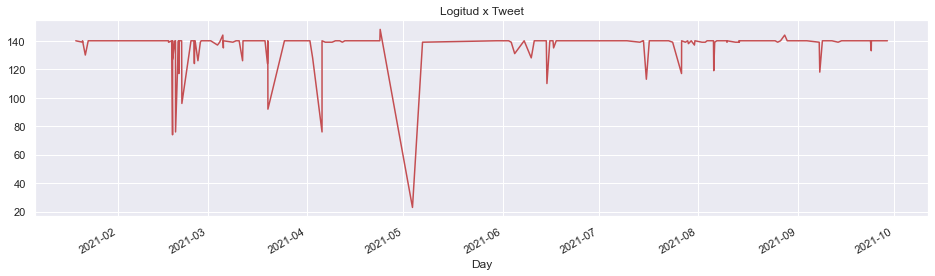

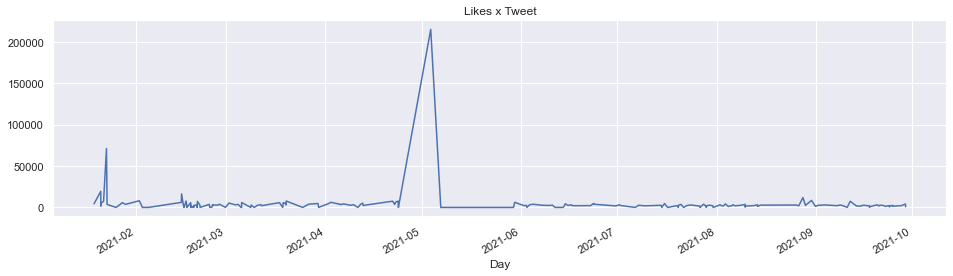

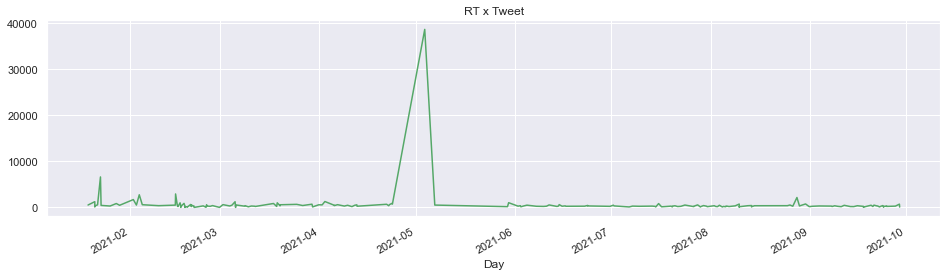

In [15]:
# Time Series

time_likes = pd.Series(data=df['Long'].values, index=df['Day'])
time_likes.plot(figsize=(16, 4), color='r')
plt.title('Logitud x Tweet')
plt.show()
    
time_favs = pd.Series(data=df['Likes'].values, index=df['Day'])
time_favs.plot(figsize=(16, 4), color='b')
plt.title('Likes x Tweet')
plt.show()

time_retweets = pd.Series(data=df['Retweets'].values, index=df['Day'])
time_retweets.plot(figsize=(16, 4), color='g')
plt.title('RT x Tweet')
plt.show()

In [16]:
# function to clear tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #eliminate mencions (@)
 text = re.sub('#', '', text) # eliminate hashtags (#)
 text = re.sub('RT[\s]+', '', text) # eliminate RT
 text = re.sub('https?:\/\/\S+', '', text) # eliminate Hiperlinks
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets,ID,Long,Day,Sourse,Likes,Retweets
0,Congratulations on this well-deserved recogni...,1443001944658755597,140,2021-09-28 23:57:27,Twitter Web App,803,84
1,Congratulations on the national launch of Ayu...,1442973036081139714,140,2021-09-28 22:02:35,Twitter Web App,4132,716
2,What if your smart phone could detect Alzheime...,1442517577394098177,140,2021-09-27 15:52:45,Twitter Web App,2130,285
3,India is a great example of a country that has...,1441518443895820293,140,2021-09-24 21:42:33,Twitter Web App,1544,226
4,Expanding the geography of vaccine manufacturi...,1441518440305487878,140,2021-09-24 21:42:32,Twitter Web App,2416,320
...,...,...,...,...,...,...,...
195,And while COVID-19 will rightfully continue to...,1352021075358482432,140,2021-01-20 22:31:58,Twitter Web App,5200,324
196,The President’s commitment to reengage with th...,1352021074544795653,140,2021-01-20 22:31:58,Twitter Web App,5130,280
197,With Americans across the country working toge...,1352021073756254209,140,2021-01-20 22:31:57,Twitter Web App,1593,95
198,I look forward to working with President and ...,1352021072980295680,139,2021-01-20 22:31:57,Twitter Web App,19464,1250


In [17]:
# function to analyse the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# function to analyse the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# New columns with the reuslts
df['Subjetivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,ID,Long,Day,Sourse,Likes,Retweets,Subjetivity,Polarity
0,Congratulations on this well-deserved recogni...,1443001944658755597,140,2021-09-28 23:57:27,Twitter Web App,803,84,0.625000,0.500000
1,Congratulations on the national launch of Ayu...,1442973036081139714,140,2021-09-28 22:02:35,Twitter Web App,4132,716,0.000000,0.000000
2,What if your smart phone could detect Alzheime...,1442517577394098177,140,2021-09-27 15:52:45,Twitter Web App,2130,285,0.642857,0.214286
3,India is a great example of a country that has...,1441518443895820293,140,2021-09-24 21:42:33,Twitter Web App,1544,226,0.750000,0.800000
4,Expanding the geography of vaccine manufacturi...,1441518440305487878,140,2021-09-24 21:42:32,Twitter Web App,2416,320,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...
195,And while COVID-19 will rightfully continue to...,1352021075358482432,140,2021-01-20 22:31:58,Twitter Web App,5200,324,0.000000,0.000000
196,The President’s commitment to reengage with th...,1352021074544795653,140,2021-01-20 22:31:58,Twitter Web App,5130,280,0.000000,0.000000
197,With Americans across the country working toge...,1352021073756254209,140,2021-01-20 22:31:57,Twitter Web App,1593,95,0.500000,0.500000
198,I look forward to working with President and ...,1352021072980295680,139,2021-01-20 22:31:57,Twitter Web App,19464,1250,0.000000,0.000000


In [18]:
# Wordcloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [20]:
# Function to asign positive, negative or neutral
def getAnalysis(score):
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'
        
df['Análisis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,ID,Long,Day,Sourse,Likes,Retweets,Subjetivity,Polarity,Analysis
0,Congratulations on this well-deserved recogni...,1443001944658755597,140,2021-09-28 23:57:27,Twitter Web App,803,84,0.625000,0.500000,Positivo
1,Congratulations on the national launch of Ayu...,1442973036081139714,140,2021-09-28 22:02:35,Twitter Web App,4132,716,0.000000,0.000000,Neutral
2,What if your smart phone could detect Alzheime...,1442517577394098177,140,2021-09-27 15:52:45,Twitter Web App,2130,285,0.642857,0.214286,Positivo
3,India is a great example of a country that has...,1441518443895820293,140,2021-09-24 21:42:33,Twitter Web App,1544,226,0.750000,0.800000,Positivo
4,Expanding the geography of vaccine manufacturi...,1441518440305487878,140,2021-09-24 21:42:32,Twitter Web App,2416,320,0.500000,0.500000,Positivo
...,...,...,...,...,...,...,...,...,...,...
195,And while COVID-19 will rightfully continue to...,1352021075358482432,140,2021-01-20 22:31:58,Twitter Web App,5200,324,0.000000,0.000000,Neutral
196,The President’s commitment to reengage with th...,1352021074544795653,140,2021-01-20 22:31:58,Twitter Web App,5130,280,0.000000,0.000000,Neutral
197,With Americans across the country working toge...,1352021073756254209,140,2021-01-20 22:31:57,Twitter Web App,1593,95,0.500000,0.500000,Positivo
198,I look forward to working with President and ...,1352021072980295680,139,2021-01-20 22:31:57,Twitter Web App,19464,1250,0.000000,0.000000,Neutral


In [22]:
# some positive tweets
print('Some positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positivo'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Some positive tweets:

1) Congratulations  on this well-deserved recognition. Like you, I’m optimistic that we will be able to bring th… 

2) What if your smart phone could detect Alzheimer’s? 's Diagnostics Accelerator is working to make this a rea… 

3) India is a great example of a country that has invested in its capacity. Today 2/3rds of all the world's children r… 

4) Expanding the geography of vaccine manufacturing to better meet vaccine needs, both for pandemics and routine immun… 

5) Thanks for having me on the show, ! And thanks to the all of the late night hosts for focusing on this cri… 

6) Thanks for the conversation and for your leadership in helping to end this pandemic and prevent the next one. 

7) More than 80% of COVID-19 vaccines have been administered in high- and upper-middle-income countries while less tha… 

8) A global response will help the world end the COVID crisis. I'm glad to see so many leaders coming together at this… 

9) There are three things that 

In [128]:
# some negative tweets
print('Some negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polaridad'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Análisis'][i] == 'Negativo'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Algunos de los Tweets reconocidos como negativos:

1) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion o… 

2) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at… 

3) 30: Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to… 

6) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise m… 

7) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

8) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and o

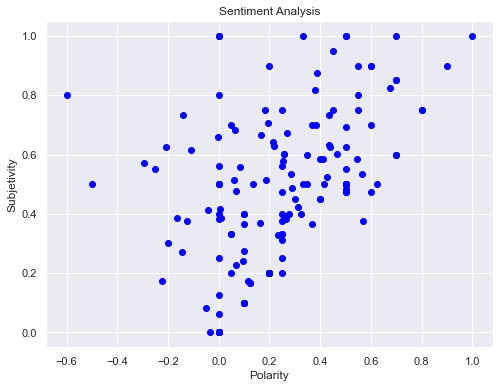

In [23]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjetivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjetivity') 
plt.show()

In [25]:
# porcentaje de Tweets Positivos
ptweets = df[df.Analysis == 'Positivo']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

61.5

In [26]:
# Percentage of the positive tweets
ntweets = df[df.Analysis == 'Negativo']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

8.0

In [27]:
# Quantity per sentiment
df['Analysis'].value_counts()

Positivo    123
Neutral      61
Negativo     16
Name: Analysis, dtype: int64

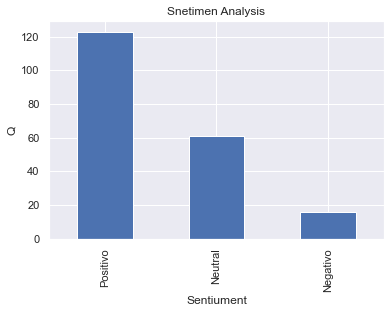

In [28]:
# plot the quantity per sentiment
plt.title('Snetimen Analysis')
plt.xlabel('Sentiument')
plt.ylabel('Q')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()